In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [4]:
df=pd.read_csv("Fraud_check.csv")

In [5]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
for i in range(len(df['Taxable.Income'])):
    if df['Taxable.Income'][i] <= 30000:
        df['Taxable.Income'][i] = 'risky'
    else:
        df['Taxable.Income'][i] = 'good'

<ipython-input-6-f4f1cb848579>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Taxable.Income'][i] = 'good'
C:\Users\bhavy\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-6-f4f1cb848579>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Taxable.Income'][i] = 'risky'


In [7]:

df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO


In [28]:
label_encoder = preprocessing.LabelEncoder()
df['Taxable.Income']= label_encoder.fit_transform(df['Taxable.Income']) 

In [32]:
x=df.iloc[:, [0,1,2,3,5]]
y=df.iloc[:,4]

In [33]:
x

,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,50047,10,0,0,1
1,134075,18,1,0,1
2,160205,30,0,1,1
3,193264,15,1,0,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,1
596,55369,2,1,0,1
597,154058,0,0,0,1
598,180083,17,1,1,0


In [34]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int64

In [35]:
df['Taxable.Income'].unique()

array([0, 1], dtype=int64)

In [22]:
colnames = list(df.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Urban']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=50)

In [38]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(111.60000000000001, 190.26, 'X[0] <= 28297.0\nentropy = 0.75\nsamples = 480\nvalue = [377, 103]'),
 Text(55.800000000000004, 135.9, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(167.4, 135.9, 'X[0] <= 28452.5\nentropy = 0.755\nsamples = 474\nvalue = [371, 103]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.20000000000002, 81.53999999999999, 'X[0] <= 28990.0\nentropy = 0.752\nsamples = 473\nvalue = [371, 102]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(279.0, 27.180000000000007, 'entropy = 0.758\nsamples = 466\nvalue = [364, 102]')]

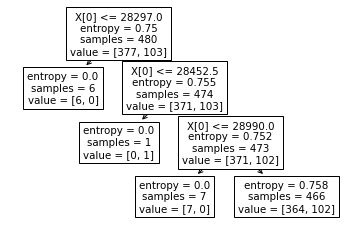

In [39]:
tree.plot_tree(model)

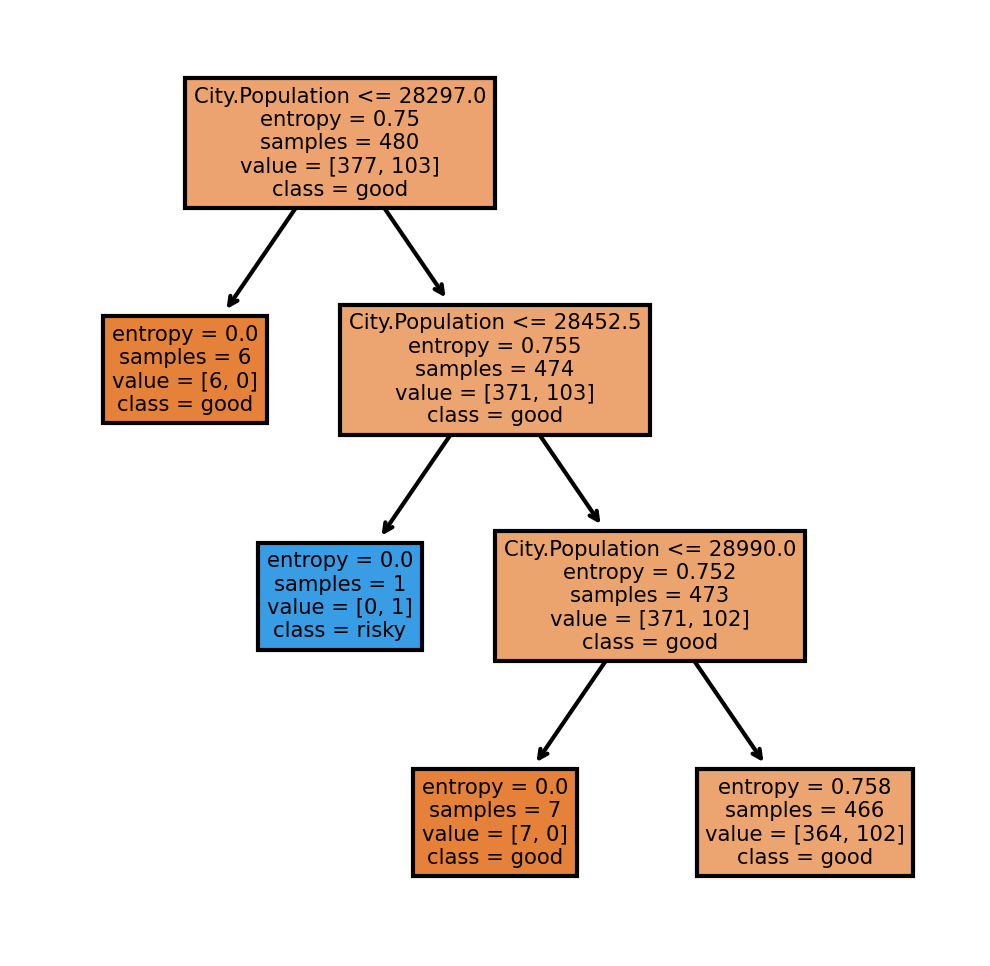

In [40]:
fn=['City.Population','Work.Experience','Undergrad','Marital.Status','Urban']
cn=['good','risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [41]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

0    119
1      1
dtype: int64

In [42]:
preds 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
pd.crosstab(y_test,preds)

col_0,0,1
Taxable.Income,,
0,98,1
1,21,0


In [45]:
np.mean(preds==y_test)

0.8166666666666667